In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
test_dir = "../dataset/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print(test_data.class_indices)


Found 440 images belonging to 5 classes.
{'normal': 0, 'vitamin_A': 1, 'vitamin_B': 2, 'vitamin_C': 3, 'vitamin_D': 4}


In [4]:
ensemble_model = load_model("../models/ensemble_model.h5")


In [5]:
ensemble_pred = ensemble_model.predict(test_data)


14/14 [==============================] - 57s 4s/step


              precision    recall  f1-score   support

      normal       0.98      1.00      0.99        54
   vitamin_A       0.98      0.99      0.99       153
   vitamin_B       0.95      1.00      0.97       175
   vitamin_C       1.00      0.89      0.94        35
   vitamin_D       1.00      0.61      0.76        23

    accuracy                           0.97       440
   macro avg       0.98      0.90      0.93       440
weighted avg       0.97      0.97      0.97       440



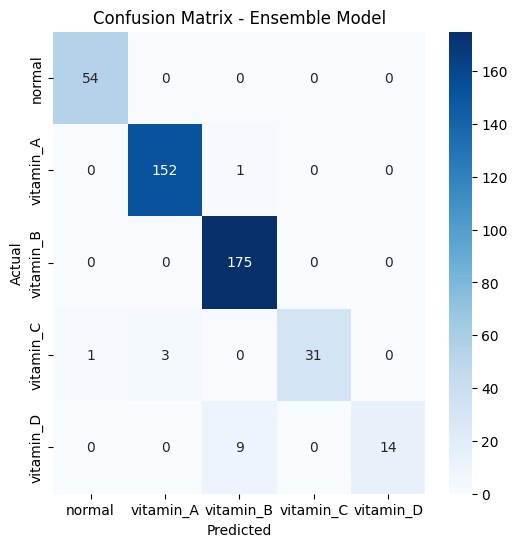

In [6]:
y_true = test_data.classes
y_pred = np.argmax(ensemble_pred, axis=1)

# Classification report
print(classification_report(
    y_true,
    y_pred,
    target_names=test_data.class_indices.keys()
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()
